In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

# 1. Data load and split

In [2]:
from src.data_split import load_data_and_config

df, cfg = load_data_and_config()

In [3]:
df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,num_baskets,total_spent,total_items,...,most_common_product_type,most_common_garment_group,most_common_colour_master,most_common_department,most_common_index_group,most_common_index,most_common_graph_appearance,most_common_prod_name,most_common_color_group,most_common_color_value
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,10,648.98303,21,...,Blazer,Jersey Fancy,Black,Suit,Ladieswear,Ladieswear,Solid,Mariette Blazer,Black,Dark
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,23,2601.93210,86,...,Bikini top,Swimwear,Blue,Swimwear,Ladieswear,Lingeries/Tights,Solid,Timeless Midrise Brief,Black,Dark
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,7,704.77966,18,...,Sweater,Blouses,Black,Blouse,Ladieswear,Ladieswear,Solid,Atlanta Push Body Harlow,Black,Dark
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,6,469.69492,13,...,Underwear body,Jersey Fancy,Black,Functional Lingerie,Ladieswear,Ladieswear,Solid,Jacket Slim,Black,Dark
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,16,3823.61000,120,...,Bra,"Under-, Nightwear",Black,Expressive Lingerie,Ladieswear,Lingeries/Tights,Solid,Croydon unitard,Black,Dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617318,ffff61677073258d461e043cc9ed4ed97be5617a920640...,1.0,1.0,ACTIVE,Regularly,32.0,f22bd5702242c63a4d40c169e9c45564b933fa5093ea80...,17,809.62714,32,...,Blouse,Jersey Fancy,Black,Jersey,Ladieswear,Ladieswear,Solid,VIOLET COLD SHOULDER,Black,Dark
617319,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,11,1292.35600,51,...,Underwear bottom,"Under-, Nightwear",Black,Swimwear,Ladieswear,Lingeries/Tights,Solid,New Girl Wide Side Tanga,Black,Dark
617320,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,19,1807.32200,84,...,T-shirt,Jersey Basic,Pink,Basic 1,Divided,Divided,Solid,Brit Baby Tee,Light Pink,Dusty Light
617321,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,19,788.93220,45,...,Trousers,Jersey Fancy,Black,Tops Fancy Jersey,Ladieswear,Divided,Solid,Cool tiebelt dressed,Black,Dark


In [4]:
from src.data_split import split_data

X_tr, X_val, X_te, y_tr, y_val, y_te = split_data(df, cfg)

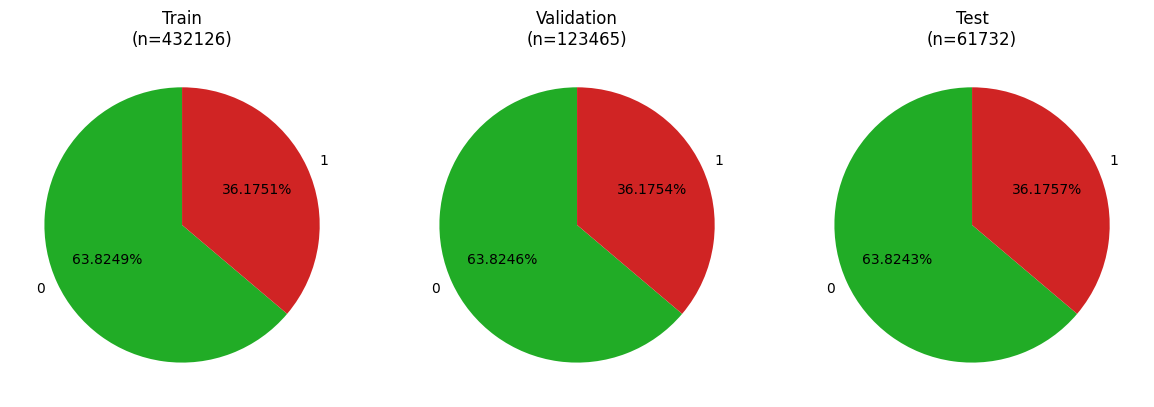

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

datasets = [("Train", y_tr), ("Validation", y_val), ("Test", y_te)]
colors = ["#21ac26", "#d02424"]

for ax, (title, y) in zip(axes, datasets):
    counts = y.value_counts(normalize=True).sort_index()
    labels = [str(cls) for cls in counts.index]
    ax.pie(
        counts,
        labels=labels,
        autopct="%.4f%%",
        startangle=90,
        colors=colors
    )
    ax.set_title(f"{title}\n(n={len(y)})")
plt.tight_layout()
plt.show()

In [ ]:
# repo_root = Path().resolve().parent
# out_dir = repo_root / "data" / "split"
# out_dir.mkdir(parents=True, exist_ok=True)

# X_tr.to_csv(out_dir / "X_train.csv", index=False)
# y_tr.to_csv(out_dir / "y_train.csv", index=False)
# X_val.to_csv(out_dir / "X_val.csv", index=False)
# y_val.to_csv(out_dir / "y_val.csv", index=False)
# X_te.to_csv(out_dir / "X_test.csv", index=False)
# y_te.to_csv(out_dir / "y_test.csv", index=False)


# 2. Hyperparameter optimization

In [2]:
from src.bayes_search import load_split_data

X_train, y_train, X_val, y_val, X_test, y_test = load_split_data()

Split data path: data\split


In [3]:
from src.bayes_search import load_xgb_bayes_config

cfg, space = load_xgb_bayes_config()

print("Konfiguracja:", cfg)

print("Przestrzeń hiperparametrów:")
for param in space:
    print(param)

Konfiguracja: {'n_trials': 10, 'random_state': 42, 'early_stopping_rounds': 50, 'processed_dir': 'data/split', 'target_name': 'churn', 'objective_name': 'binary:logistic'}
Przestrzeń hiperparametrów:
{'name': 'max_depth', 'type': 'int', 'low': 3, 'high': 10, 'log': False}
{'name': 'max_bin', 'type': 'int', 'low': 64, 'high': 256, 'log': False}
{'name': 'eta', 'type': 'float', 'low': 0.01, 'high': 0.3, 'log': True}
{'name': 'subsample', 'type': 'float', 'low': 0.5, 'high': 1.0, 'log': False}
{'name': 'colsample_bytree', 'type': 'float', 'low': 0.5, 'high': 1.0, 'log': False}
{'name': 'min_child_weight', 'type': 'float', 'low': 1.0, 'high': 10.0, 'log': False}
{'name': 'gamma', 'type': 'float', 'low': 0.0, 'high': 5.0, 'log': False}
{'name': 'reg_lambda', 'type': 'float', 'low': 0.0001, 'high': 10.0, 'log': True}
{'name': 'reg_alpha', 'type': 'float', 'low': 0.0001, 'high': 10.0, 'log': True}
{'name': 'grow_policy', 'type': 'cat', 'values': ['depthwise', 'lossguide']}
{'name': 'booster',

In [5]:
X_val

,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,num_baskets,total_spent,total_items,mean_price,...,most_common_product_type,most_common_garment_group,most_common_colour_master,most_common_department,most_common_index_group,most_common_index,most_common_graph_appearance,most_common_prod_name,most_common_color_group,most_common_color_value
0,NaN,NaN,ACTIVE,NONE,26.0,3b1fde8c00b60b31ee68c15158a56abb9669bc55ea5ec1...,26,3304.50850,90,36.716763,...,Bra,"Under-, Nightwear",Black,Expressive Lingerie,Ladieswear,Ladieswear,Solid,Bianca blazer,Black,Dark
1,NaN,NaN,PRE-CREATE,NONE,33.0,f45e397060b41b56a1e9f6078215970bc7edd9f4c487c5...,23,2895.20340,85,34.061214,...,T-shirt,Jersey Fancy,Black,Jersey Basic,Ladieswear,Ladieswear,Solid,Mademoiselle dress,Black,Dark
2,1.0,1.0,ACTIVE,Regularly,25.0,09a63192b53b86cb43b7412ffed4f3843097ed29a8d1e9...,25,3502.77950,86,40.729996,...,Trousers,Jersey Fancy,Black,Swimwear,Ladieswear,Ladieswear,Solid,Chore Jacket,Black,Dark
3,NaN,NaN,ACTIVE,NONE,45.0,92108b21d4099330a2c9dd466cdd26d84b7048e3e979e8...,5,226.93220,11,20.630200,...,Bra,"Under-, Nightwear",White,Expressive Lingerie,Ladieswear,Lingeries/Tights,Solid,Melrose,Black,Dusty Light
4,1.0,1.0,ACTIVE,Regularly,39.0,b63a7afec501bfe2528c916ab0c95ba617cf38dd64f431...,68,2349.39000,116,20.253360,...,Dress,Jersey Fancy,Black,Expressive Lingerie,Ladieswear,Ladieswear,Solid,Cissi tube top,Black,Dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123460,NaN,NaN,ACTIVE,NONE,27.0,d4ac516144205bc60abeaaab44d2763d1785ec1adb4534...,17,1683.40670,63,26.720743,...,Sweater,Socks and Tights,Black,Tights basic,Ladieswear,Lingeries/Tights,Solid,Support 40 den 1p Tights,Black,Dark
123461,NaN,NaN,ACTIVE,NONE,20.0,b76c914328ffa9414d0e9dcc5d9afd4785c497bb9ac5d1...,4,86.37288,4,21.593220,...,Sweater,Knitwear,Black,Knitwear,Ladieswear,Ladieswear,Solid,Bama,Black,Dark
123462,NaN,NaN,ACTIVE,NONE,24.0,a280f78dc494439060f31492633007d5e5bcf960fd5e7d...,9,1116.22030,43,25.958612,...,Bikini top,Swimwear,Black,Swimwear,Ladieswear,Lingeries/Tights,Solid,Cat Tee.,Black,Dark
123463,NaN,NaN,ACTIVE,NONE,26.0,cd19c7cc878cdff83b1da776aa085f47e7edc1da9dfd73...,9,718.42370,33,21.770416,...,T-shirt,Jersey Fancy,Black,Swimwear,Ladieswear,Divided,All over pattern,TANJA SKIRT,Black,Dark


In [4]:
from src.bayes_search import train_xgb_bayes, test_xgb

model, params, val_auc = train_xgb_bayes(X_val, y_val, cfg, space)

[trial 1/10] auc=0.904423 | best=0.904423 | trees=51 | secs=52.48 | params={'max_depth': np.int64(9), 'max_bin': np.int64(99), 'eta': 0.14180715647623932, 'subsample': 0.7984250789732436, 'colsample_bytree': 0.7229163764267956, 'min_child_weight': 1.8997742423620263, 'gamma': 2.296244459829336, 'reg_lambda': 0.004661686413912771, 'reg_alpha': 0.0005180051644243022, 'grow_policy': 'lossguide', 'booster': 'gbtree', 'sampling_method': 'uniform'}
[trial 2/10] auc=0.900093 | best=0.904423 | trees=24 | secs=37.15 | params={'max_depth': np.int64(10), 'max_bin': np.int64(64), 'eta': 0.292157327654986, 'subsample': 0.8087407548138583, 'colsample_bytree': 0.8058265802441404, 'min_child_weight': 1.0635967469774568, 'gamma': 0.1153121252070788, 'reg_lambda': 0.042060390579019995, 'reg_alpha': 0.009984006580328664, 'grow_policy': 'depthwise', 'booster': 'dart', 'sampling_method': 'uniform'}
[trial 3/10] auc=0.904621 | best=0.904621 | trees=659 | secs=651.21 | params={'max_depth': np.int64(4), 'max_

In [4]:
from src.bayes_search import tune_xgb_hyperparams
best_params = tune_xgb_hyperparams(X_val, y_val, cfg, space)
print("Najlepsze hiperparametry:", best_params)

[trial 1/10] auc=0.904423 | best=0.904423 | params={'max_depth': np.int64(9), 'max_bin': np.int64(99), 'eta': 0.14180715647623932, 'subsample': 0.7984250789732436, 'colsample_bytree': 0.7229163764267956, 'min_child_weight': 1.8997742423620263, 'gamma': 2.296244459829336, 'reg_lambda': 0.004661686413912771, 'reg_alpha': 0.0005180051644243022, 'grow_policy': 'lossguide', 'booster': 'gbtree', 'sampling_method': 'uniform'} | time=56.98s
[trial 2/10] auc=0.900093 | best=0.904423 | params={'max_depth': np.int64(10), 'max_bin': np.int64(64), 'eta': 0.292157327654986, 'subsample': 0.8087407548138583, 'colsample_bytree': 0.8058265802441404, 'min_child_weight': 1.0635967469774568, 'gamma': 0.1153121252070788, 'reg_lambda': 0.042060390579019995, 'reg_alpha': 0.009984006580328664, 'grow_policy': 'depthwise', 'booster': 'dart', 'sampling_method': 'uniform'} | time=45.13s
[trial 3/10] auc=0.904621 | best=0.904621 | params={'max_depth': np.int64(4), 'max_bin': np.int64(183), 'eta': 0.0367233875955265

In [5]:
print("best:", params, "| val AUC:", val_auc)
print(test_xgb(model, X_test, y_test))

best: {'max_depth': np.int64(8), 'max_bin': np.int64(168), 'eta': 0.07357031542417705, 'subsample': 0.982627653632069, 'colsample_bytree': 0.8035171238433424, 'min_child_weight': 3.4839926382028907, 'gamma': 1.4813675285204122, 'reg_lambda': 0.0006704010646472259, 'reg_alpha': 0.00011972422479639325, 'grow_policy': 'depthwise', 'booster': 'gbtree', 'sampling_method': 'uniform'} | val AUC: 0.9067282074791412


TypeError: got an unexpected keyword argument 'eps'

In [ ]:
from src.model import xgb_train
import xgboost as xgb
# Załóżmy, że mamy już best_params z funkcji tune_xgb_hyperparams
booster = xgb_train(X_train, y_train, best_params, num_boost_round=500, early_stopping_rounds=30)

# Predykcje na zbiorze testowym
dtest = xgb.DMatrix(X_test, enable_categorical=True)
y_pred = booster.predict(dtest)
